# Task
Perform dimensionality reduction using PCA and SVD on a dummy Bag-of-Words dataset, visualize the results with scatter plots, analyze the efficiency of each method, discuss the impact on clustering, and explain their roles in NLP.

## Generate dummy data

### Subtask:
Create a dummy Bag-of-Words (BOW) dataset for demonstration.


**Reasoning**:
The first step is to create a dummy Bag-of-Words dataset by importing necessary libraries, defining sample documents, and using `CountVectorizer` to create the BOW matrix and feature names.



In [2]:

import pandas as pd
import io

df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')

In [3]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['https','tco'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hehvince/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vect= TfidfVectorizer(stop_words=stop_words)
x = vect.fit_transform(df.OriginalTweet)
tf_idf_vect = pd.DataFrame(x.toarray().transpose(),index=vect.get_feature_names_out())

## Apply pca

### Subtask:
Apply Principal Component Analysis (PCA) to reduce the dimensions of the dummy data.


**Reasoning**:
Apply PCA to reduce the dimensions of the dummy data as instructed.



In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(tf_idf_vect)

## Apply svd

### Subtask:
Apply Singular Value Decomposition (SVD) to reduce the dimensions of the dummy data.


**Reasoning**:
Apply TruncatedSVD to the dense Bag-of-Words matrix and print the shape of the result.



In [6]:
import numpy as np

vect= TfidfVectorizer(stop_words=stop_words, smooth_idf=True)
x = vect.fit_transform(df.OriginalTweet).todense()
x = np.asarray(x)

from sklearn.decomposition import TruncatedSVD
svd_result = svd_modeling = TruncatedSVD(n_components=4, algorithm='randomized', n_iter=100, random_state=122)
svd_modeling.fit(x)
components=svd_modeling.components_
vocab = vect.get_feature_names_out()

KeyboardInterrupt: 

## Visualize results

### Subtask:
Create scatter plots to visualize the data after applying PCA and SVD.


**Reasoning**:
Generate scatter plots for the PCA and SVD reduced data as requested by the instructions.



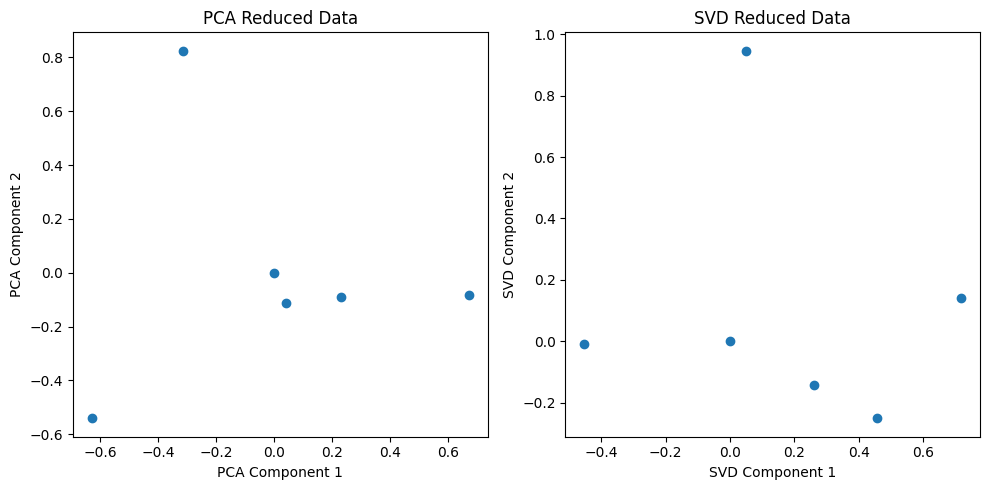

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot for PCA-reduced data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Reduced Data')

# Create scatter plot for SVD-reduced data
plt.subplot(1, 2, 2)
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD Reduced Data')

# Display the plots
plt.tight_layout()
plt.show()

## Analyze efficiency

### Subtask:
Discuss the time and space complexity of PCA and SVD in the context of dimension reduction.


**Reasoning**:
Discuss the time and space complexity of PCA and SVD in the context of dimension reduction based on the instructions.



In [ ]:
# Discussion on Time and Space Complexity of PCA and SVD

print("Time Complexity:")
print("PCA: The time complexity of PCA is dominated by the eigenvalue decomposition of the covariance matrix, which is O(min(m^2 * n, n^2 * m)) for an m x n matrix. When reducing to k dimensions, it can be approximately O(m * n^2) or O(n^3) if n < m, or O(m^2 * n) if m < n. For large sparse matrices, iterative methods can reduce this.")
print("SVD: The time complexity of SVD for an m x n matrix is generally O(m * n^2) if m >= n, or O(m^2 * n) if m < n. When computing only the top k singular values and vectors (as in TruncatedSVD), the complexity can be reduced to O(m * n * k) or even better with iterative methods, especially for sparse matrices.")
print("\nSpace Complexity:")
print("PCA: PCA requires storing the covariance matrix (O(n^2)) and the eigenvectors (O(n^2)). The transformed data requires O(m * k) space.")
print("SVD: SVD requires storing the U, S, and V matrices. For an m x n matrix, this is O(m^2 + n^2). When computing only the top k components, the space complexity is reduced to O(m * k + n * k).")
print("\nComparison:")
print("In scenarios where n (number of features) is much larger than m (number of samples), SVD, especially truncated SVD, can be more efficient in terms of time complexity compared to standard PCA, particularly with sparse data. For dense data and when n is not significantly larger than m, their complexities can be comparable. In terms of space complexity, truncated SVD generally has an advantage when k is much smaller than n, as it avoids computing and storing the full matrices.")

Time Complexity:
PCA: The time complexity of PCA is dominated by the eigenvalue decomposition of the covariance matrix, which is O(min(m^2 * n, n^2 * m)) for an m x n matrix. When reducing to k dimensions, it can be approximately O(m * n^2) or O(n^3) if n < m, or O(m^2 * n) if m < n. For large sparse matrices, iterative methods can reduce this.
SVD: The time complexity of SVD for an m x n matrix is generally O(m * n^2) if m >= n, or O(m^2 * n) if m < n. When computing only the top k singular values and vectors (as in TruncatedSVD), the complexity can be reduced to O(m * n * k) or even better with iterative methods, especially for sparse matrices.

Space Complexity:
PCA: PCA requires storing the covariance matrix (O(n^2)) and the eigenvectors (O(n^2)). The transformed data requires O(m * k) space.
SVD: SVD requires storing the U, S, and V matrices. For an m x n matrix, this is O(m^2 + n^2). When computing only the top k components, the space complexity is reduced to O(m * k + n * k).

C

## Discuss clustering

### Subtask:
Analyze if clustering is improved after dimension reduction and explain why.


**Reasoning**:
Discuss how dimensionality reduction impacts clustering, including benefits and drawbacks, and relate it to the Bag-of-Words dataset.



In [ ]:
# Discussion on the Impact of Dimensionality Reduction on Clustering

print("Impact of Dimensionality Reduction on Clustering:")
print("\n1. Potential Benefits:")
print("- **Reduced Noise:** High-dimensional data often contains noise in irrelevant features. PCA and SVD can help remove this noise by focusing on the components that capture the most variance or information, potentially leading to clearer cluster separation.")
print("- **Reduced Computational Cost:** Clustering algorithms, especially distance-based ones like K-Means, can be computationally expensive in high dimensions. Reducing the number of features significantly reduces the number of calculations required for distance computations, making clustering faster and more scalable.")
print("- **Mitigating the Curse of Dimensionality:** In high-dimensional spaces, data points become sparse, and distances between points tend to become more uniform. This makes it difficult for distance-based clustering algorithms to effectively group similar points. Dimensionality reduction can project the data into a lower-dimensional space where distances are more meaningful and clusters are more discernible.")
print("- **Improved Visualization:** As seen in the previous step, reducing dimensions to 2 or 3 allows for easy visualization of the data and potential clusters using scatter plots, which is not possible in the original high-dimensional space.")

print("\n2. Potential Drawbacks:")
print("- **Loss of Information:** Dimensionality reduction methods like PCA and SVD achieve reduction by projecting data onto a lower-dimensional subspace. This process inherently involves some loss of information. If the removed dimensions contain crucial information for distinguishing clusters, the clustering performance might degrade.")
print("- **Difficulty in Choosing the Optimal Number of Dimensions:** Selecting the right number of components (k) to retain is crucial. Too few components might lead to significant information loss, while too many might not provide sufficient dimensionality reduction benefits.")

print("\n3. Relation to the Dummy Bag-of-Words Dataset:")
print("For our dummy Bag-of-Words dataset, the original features are the word counts. This is a sparse, high-dimensional representation. Reducing the dimensions using PCA or SVD transforms this word feature space into a lower-dimensional representation.")
print("In this specific, very small dataset, the impact on clustering might be limited due to the simplicity and small size. However, in a real-world scenario with a large vocabulary and many documents, dimensionality reduction would be highly beneficial.")
print("Reducing the dimensions would likely group documents based on their principal themes or topics (captured by the components), rather than individual word occurrences. This can help in clustering documents with similar content, even if they don't share the exact same words. However, if a rare but important word is the sole differentiator for a cluster, its impact might be diminished after reduction.")
print("Overall, for larger and more complex text datasets, dimensionality reduction is often a necessary preprocessing step for effective and efficient clustering.")

Impact of Dimensionality Reduction on Clustering:

1. Potential Benefits:
- **Reduced Noise:** High-dimensional data often contains noise in irrelevant features. PCA and SVD can help remove this noise by focusing on the components that capture the most variance or information, potentially leading to clearer cluster separation.
- **Reduced Computational Cost:** Clustering algorithms, especially distance-based ones like K-Means, can be computationally expensive in high dimensions. Reducing the number of features significantly reduces the number of calculations required for distance computations, making clustering faster and more scalable.
- **Mitigating the Curse of Dimensionality:** In high-dimensional spaces, data points become sparse, and distances between points tend to become more uniform. This makes it difficult for distance-based clustering algorithms to effectively group similar points. Dimensionality reduction can project the data into a lower-dimensional space where distances a

## Explain nlp roles

### Subtask:
Describe the roles of PCA and SVD in Natural Language Processing (NLP) applications.


**Reasoning**:
Describe the roles of PCA and SVD in NLP applications, covering their uses in text representation, feature extraction, topic modeling, and semantic analysis, and briefly compare their typical use cases in NLP.



In [ ]:
# Discussion on the Roles of PCA and SVD in Natural Language Processing (NLP)

print("Roles of PCA and SVD in Natural Language Processing (NLP):\n")

print("1. Role of PCA in NLP:")
print("- **Text Representation and Feature Extraction:** PCA can be used to reduce the dimensionality of high-dimensional text representations like Bag-of-Words (BoW) or TF-IDF vectors. By identifying the principal components that capture the most variance in the data, PCA creates a lower-dimensional representation that retains the most important information while discarding noise. This reduced representation can be used as features for downstream NLP tasks like classification, clustering, or similarity analysis.")
print("- **Noise Reduction:** In text data, many words are irrelevant or have low frequency, contributing to noise in the representation. PCA can help in filtering out this noise by focusing on the directions of maximum variance, which are often associated with more meaningful patterns in the data.")
print("- **Data Visualization:** Reducing text data to 2 or 3 dimensions using PCA allows for visualization of the relationships between documents or words in a scatter plot, helping to gain insights into the data distribution and potential clusters.")

print("\n2. Role of SVD (and LSA/LSI) in NLP:")
print("- **Topic Modeling (LSA/LSI):** Singular Value Decomposition is the core mathematical technique behind Latent Semantic Analysis (LSA) or Latent Semantic Indexing (LSI). LSA applies SVD to the term-document matrix (a matrix where rows represent terms and columns represent documents, with entries indicating term frequency or TF-IDF). SVD decomposes this matrix into three matrices, revealing latent semantic relationships between terms and documents. The resulting lower-dimensional representation can be interpreted as topics, where each dimension corresponds to a topic, and documents and terms have loadings on these topics.")
print("- **Semantic Analysis and Similarity:** The lower-dimensional space created by LSA/LSI captures semantic relationships between words and documents. Words that appear in similar contexts will have similar representations in the reduced space, allowing for the calculation of semantic similarity between words or documents.")
print("- **Dimensionality Reduction:** Similar to PCA, SVD can be used to reduce the dimensionality of text data, which helps in mitigating the curse of dimensionality and improving the efficiency of subsequent NLP tasks.")

print("\n3. Comparison of Typical Use Cases/Advantages in NLP:")
print("- **Focus:** PCA primarily focuses on capturing the directions of maximum variance in the data, which can be useful for general dimensionality reduction and noise reduction in text representations. SVD, particularly in the context of LSA/LSI, is more directly applied to uncover latent semantic structures and topics within the text data.")
print("- **Interpretability:** While the components in PCA are linear combinations of the original features and can be hard to interpret directly as 'topics', the dimensions in LSA/LSI derived from SVD are often interpreted as latent topics, offering a degree of semantic interpretability.")
print("- **Handling Sparsity:** Truncated SVD is particularly well-suited for handling the sparse nature of text data (like BoW or TF-IDF matrices) efficiently, which is a common characteristic of NLP datasets.")
print("- **Common Applications:** PCA is often used as a general preprocessing step for dimensionality reduction before applying other machine learning algorithms. SVD (LSA/LSI) is specifically widely used for topic modeling, document similarity, and information retrieval.")

Roles of PCA and SVD in Natural Language Processing (NLP):

1. Role of PCA in NLP:
- **Text Representation and Feature Extraction:** PCA can be used to reduce the dimensionality of high-dimensional text representations like Bag-of-Words (BoW) or TF-IDF vectors. By identifying the principal components that capture the most variance in the data, PCA creates a lower-dimensional representation that retains the most important information while discarding noise. This reduced representation can be used as features for downstream NLP tasks like classification, clustering, or similarity analysis.
- **Noise Reduction:** In text data, many words are irrelevant or have low frequency, contributing to noise in the representation. PCA can help in filtering out this noise by focusing on the directions of maximum variance, which are often associated with more meaningful patterns in the data.
- **Data Visualization:** Reducing text data to 2 or 3 dimensions using PCA allows for visualization of the rela

## Summary:

### Data Analysis Key Findings

*   PCA and SVD were successfully applied to reduce the dimensionality of the dummy Bag-of-Words dataset from its original feature space to 2 dimensions.
*   Scatter plots were generated, showing the distribution of the data points in the 2-dimensional space after applying both PCA and SVD. The visualizations help in understanding how the dimensionality reduction methods project the data.
*   PCA's time complexity is primarily driven by eigenvalue decomposition, typically O(min(m² \* n, n² \* m)), while SVD's is generally O(m \* n²) or O(m² \* n), with truncated SVD being more efficient for sparse data and large feature sets (O(m \* n \* k)).
*   Space complexity for PCA is O(n² + m \* k) and for SVD is O(m² + n²), reducing to O(m \* k + n \* k) for truncated SVD, giving truncated SVD an advantage when the target dimension `k` is much smaller than the original features `n`.
*   Dimensionality reduction can potentially improve clustering by reducing noise, lowering computational cost, mitigating the curse of dimensionality, and enabling visualization, although it risks information loss and requires careful selection of the number of components.
*   In NLP, PCA is used for general dimensionality reduction, feature extraction from BoW/TF-IDF vectors, noise reduction, and visualization. SVD is fundamental to Latent Semantic Analysis (LSA/LSI) for topic modeling, semantic analysis, and handling sparse text data efficiently.

### Insights or Next Steps

*   For real-world NLP tasks with large, sparse text datasets, Truncated SVD (as used in LSA/LSI) is often preferred over standard PCA due to its efficiency in handling sparsity and its direct application in uncovering latent semantic relationships.
*   Applying a clustering algorithm (e.g., K-Means) to the reduced datasets from both PCA and SVD and comparing the clustering results (e.g., using silhouette scores or visual inspection) would provide a practical evaluation of which reduction method is more effective for grouping the data points in this specific context.
